In [1]:
import numpy as np
import pandas as pd
from nilearn.image import load_img,resample_to_img,mean_img
from nilearn.masking import apply_mask
import statsmodels.api as sm

**提取个体ROI下EC 和VMPFC的激活，然后加上年龄和成绩，做一个中介分析**

In [56]:
# load participant information
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv,sep='\t')
data = participants_data.query('game1_fmri==1')  # look out
subject = data['Participant_ID']
sub_age = data['Age']  # age
sub_acc = data['game1_acc']  # game1_acc

# load activity of EC and vmPFC
# EC
sub_EC_activity = []
for sub in subject:
    sub = sub.replace('_','-')
    roi = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/defROI/None_test_func_roi_group.nii'.format(sub))
    zmap = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/training_set/trainsetall/6fold/{}/spmF_0004.nii'.format(sub))
    roi = resample_to_img(roi, zmap,interpolation='nearest')
    activity = np.nanmean(apply_mask(imgs=zmap,mask_img=roi))
    sub_EC_activity.append(activity)

# vmPFC
sub_vmPFC_activity = []
for sub in subject:
    sub = sub.replace('_','-')
    roi = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/defROI/vmpfc/vmpfc_func_roi_group.nii'.format(sub))
    zmap = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/training_set/trainsetall/6fold/{}/ZF_0004.nii'.format(sub))
    roi = resample_to_img(roi, zmap,interpolation='nearest')
    activity = np.nanmean(apply_mask(imgs=zmap,mask_img=roi))
    sub_vmPFC_activity.append(activity)

                            OLS Regression Results                            
Dep. Variable:         vmPFC_activity   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     2.284
Date:                Sat, 23 Apr 2022   Prob (F-statistic):              0.115
Time:                        00:29:48   Log-Likelihood:                -66.928
No. Observations:                  42   AIC:                             139.9
Df Residuals:                      39   BIC:                             145.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3283      1.104     -0.297      0.7

<ipython-input-58-b2bf70ee23bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EC_activity'] = sub_EC_activity
<ipython-input-58-b2bf70ee23bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['vmPFC_activity'] = sub_vmPFC_activity
<ipython-input-58-b2bf70ee23bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

SpearmanrResult(correlation=0.03290646879574268, pvalue=0.8361048489565979)

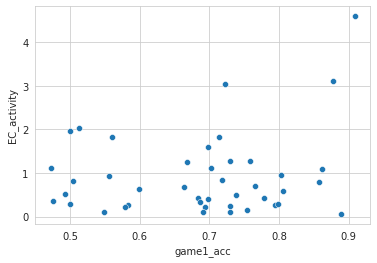

In [58]:
# mediation analysis
data['EC_activity'] = sub_EC_activity
data['vmPFC_activity'] = sub_vmPFC_activity
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
X = data[['Age','game1_acc']]
Y = data['vmPFC_activity']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=data,x='game1_acc',y='EC_activity')
"""
import statsmodels.api as sm
from statsmodels.stats.mediation import Mediation
import statsmodels.genmod.families.links as links
probit = links.probit
outcome_model = sm.GLM.from_formula("game1_acc ~ vmPFC_activity + Age ",data, family=sm.families.Binomial(link=probit()))
mediator_model = sm.OLS.from_formula("vmPFC_activity ~ Age", data)
med = Mediation(outcome_model, mediator_model, "Age", "vmPFC_activity").fit()
print(med.summary())
"""
from scipy.stats import spearmanr
spearmanr(data['game1_acc'],data['EC_activity'])

**提取Park's ROI下EC 和VMPFC的激活，然后加上年龄和成绩，做一个中介分析**

In [63]:
# load participant information
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv,sep='\t')
data = participants_data.query('game1_fmri==1')  # look out
subject = data['Participant_ID']
sub_age = data['Age']  # age
sub_acc = data['game1_acc']  # game1_acc

# load activity of EC and vmPFC
# EC
sub_EC_activity = []
for sub in subject:
    sub = sub.replace('_','-')
    roi = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/defROI/EC_func_roi_group.nii')
    zmap = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/training_set/trainsetall/6fold/{}/ZF_0004.nii'.format(sub))
    roi = resample_to_img(roi, zmap,interpolation='nearest')
    activity = np.nanmean(apply_mask(imgs=zmap,mask_img=roi))
    sub_EC_activity.append(activity)

# vmPFC
sub_vmPFC_activity = []
for sub in subject:
    sub = sub.replace('_','-')
    roi = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/defROI/vmpfc_func_roi_group.nii')
    zmap = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/training_set/trainsetall/6fold/{}/ZF_0004.nii'.format(sub))
    roi = resample_to_img(roi, zmap,interpolation='nearest')
    activity = np.nanmean(apply_mask(imgs=zmap,mask_img=roi))
    sub_vmPFC_activity.append(activity)

/home/dell/Software/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


                            OLS Regression Results                            
Dep. Variable:              game1_acc   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     4.659
Date:                Sat, 23 Apr 2022   Prob (F-statistic):             0.0370
Time:                        01:58:00   Log-Likelihood:                 31.291
No. Observations:                  42   AIC:                            -58.58
Df Residuals:                      40   BIC:                            -55.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6994      0.019     36.317      

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,Age ~ X,1.869425,0.883951,0.040722,0.082894,3.655956,Yes
1,EC_activity ~ X,-0.094540,0.100151,0.350851,-0.296954,0.107873,No
2,Y ~ Age,0.011871,0.002288,0.000007,0.007243,0.016499,Yes
3,Y ~ EC_activity,0.056116,0.021061,0.011156,0.013516,0.098716,Yes
4,Total,0.003470,0.018284,0.850450,-0.033483,0.040422,No
5,Direct,-0.015322,0.014386,0.293558,-0.044445,0.013801,No
6,Indirect Age,0.023749,0.014316,0.064000,0.001169,0.055310,No
7,Indirect EC_activity,-0.004957,0.004557,0.220000,-0.016413,0.002234,No


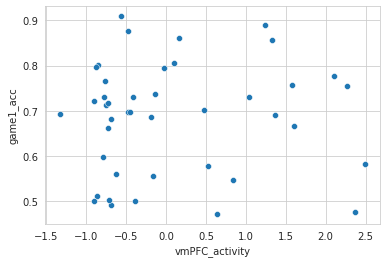

In [65]:
# mediation analysis
data.loc[:,'EC_activity'] = sub_EC_activity
data.loc[:,'vmPFC_activity'] = sub_vmPFC_activity
data.loc[:,'training_acc'] = (data['train_ap'] + data['train_dp'])/2
data.loc[:,'Age'] = data['Age'] - data['Age'].mean()
X = data[['EC_activity']]
Y = data['game1_acc']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=data,x='vmPFC_activity',y='game1_acc')

from pingouin import mediation_analysis
mediation_analysis(data=data, x='vmPFC_activity', m=['Age','EC_activity'], y='game1_acc', alpha=0.05,
                   seed=42)

**extract the align phi result**

In [36]:
# load participant information
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv,sep='\t')
data = participants_data.query('game1_fmri==1')  # look out
subject = data['Participant_ID']
sub_age = data['Age']  # age
sub_acc = data['game1_acc']  # game1_acc

# load activity of EC and vmPFC
# EC
sub_EC_activity = []
for sub in subject:
    sub = sub.replace('_','-')
    roi = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/defROI/EC/{}_EC_func_roi.nii'.format(sub))
    img1 = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/test_set/EC/testset1/6fold/{}/spmT_0001.nii'.format(sub))
    img2 = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/test_set/EC/testset2/6fold/{}/spmT_0001.nii'.format(sub))
    mimg = mean_img([img1,img2])
    roi = resample_to_img(roi, mimg,interpolation='nearest')
    activity = np.nanmean(apply_mask(imgs=mimg,mask_img=roi))
    sub_EC_activity.append(activity)

# vmPFC
sub_vmPFC_activity = []
for sub in subject:
    sub = sub.replace('_','-')
    roi = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/defROI/vmpfc/{}_vmpfc_func_roi.nii'.format(sub))
    img1 = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/test_set/EC/testset1/6fold/{}/spmT_0001.nii'.format(sub))
    img2 = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/test_set/EC/testset2/6fold/{}/spmT_0001.nii'.format(sub))
    mimg = mean_img([img1,img2])
    roi = resample_to_img(roi, mimg,interpolation='nearest')
    activity = np.nanmean(apply_mask(imgs=mimg,mask_img=roi))
    sub_vmPFC_activity.append(activity)

data.loc[:,'EC_activity'] = sub_EC_activity
data.loc[:,'vmPFC_activity'] = sub_vmPFC_activity
data.loc[:,'training_acc'] = (data['train_ap'] + data['train_dp'])/2

/home/dell/Software/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/dell/Software/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:xlabel='game1_acc', ylabel='vmPFC_activity'>

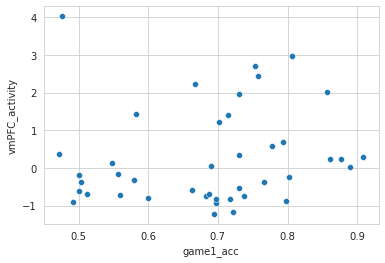

In [51]:
sns.scatterplot(data=data,x='game1_acc',y='vmPFC_activity')